<a href="https://colab.research.google.com/github/Beelzebub0126/CSEL_302_BSCS_2B_CABREZA_REN_G/blob/main/2B_CABREZA_EXER6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Part 1: Data Loading and Preprocessing

In [ ]:
data = pd.read_csv("onlinefoods.csv")

In [ ]:
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [ ]:
data['Monthly Income'] = data['Monthly Income'].astype(str)
data['Monthly Income'] = data['Monthly Income'].replace('More than 50000', '60000')
label_encoder = LabelEncoder()
data['Monthly Income'] = label_encoder.fit_transform(data['Monthly Income'])

In [ ]:
data['Monthly Income'] = data['Monthly Income'].replace('No Income', np.nan)
imputer = SimpleImputer(strategy='mean')
data['Monthly Income'] = imputer.fit_transform(data[['Monthly Income']])

In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Marital Status'] = label_encoder.fit_transform(data['Marital Status'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])

In [ ]:
selected_features = ['Age', 'Monthly Income', 'Gender', 'Marital Status', 'Occupation']

Part 2: Exploratory Data Analysis (EDA)

In [ ]:
print(data.describe())

              Age      Gender  Marital Status  Occupation  Monthly Income  \
count  388.000000  388.000000      388.000000  388.000000      388.000000   
mean    24.628866    0.572165        1.412371    1.902062        2.618557   
std      2.975593    0.495404        0.895035    1.329722        1.502407   
min     18.000000    0.000000        0.000000    0.000000        0.000000   
25%     23.000000    0.000000        0.000000    0.000000        1.000000   
50%     24.000000    1.000000        2.000000    3.000000        3.000000   
75%     26.000000    1.000000        2.000000    3.000000        4.000000   
max     33.000000    1.000000        2.000000    3.000000        4.000000   

       Family size    latitude   longitude       Pin code  
count   388.000000  388.000000  388.000000     388.000000  
mean      3.280928   12.972058   77.600160  560040.113402  
std       1.351025    0.044489    0.051354      31.399609  
min       1.000000   12.865200   77.484200  560001.000000  
25%   

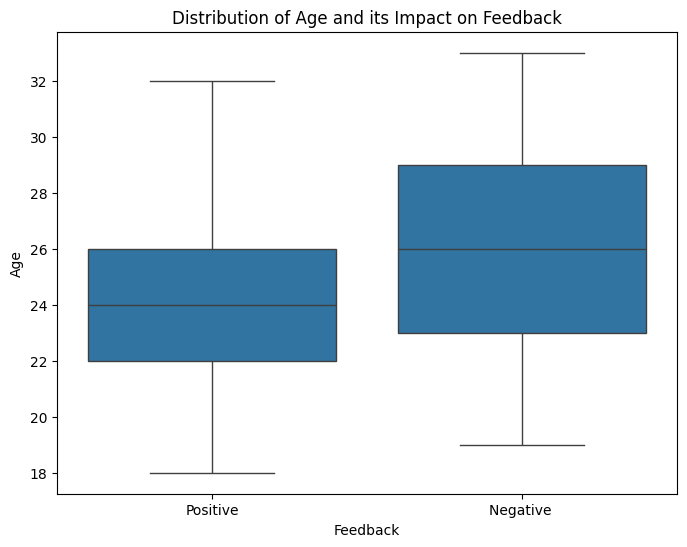

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Feedback', y='Age', data=data)
plt.title('Distribution of Age and its Impact on Feedback')
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.show()

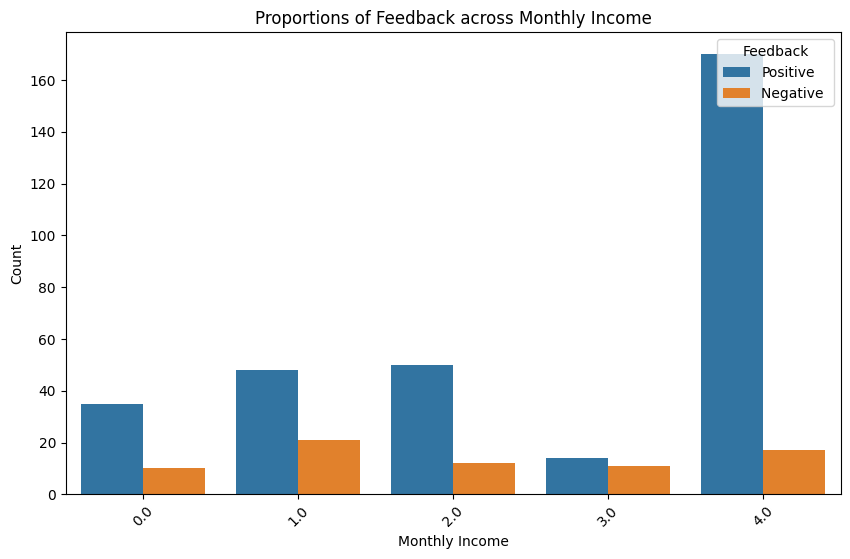

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly Income', hue='Feedback', data=data)
plt.title('Proportions of Feedback across Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Feedback', loc='upper right')
plt.show()

<ipython-input-175-3ee0a30cae46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


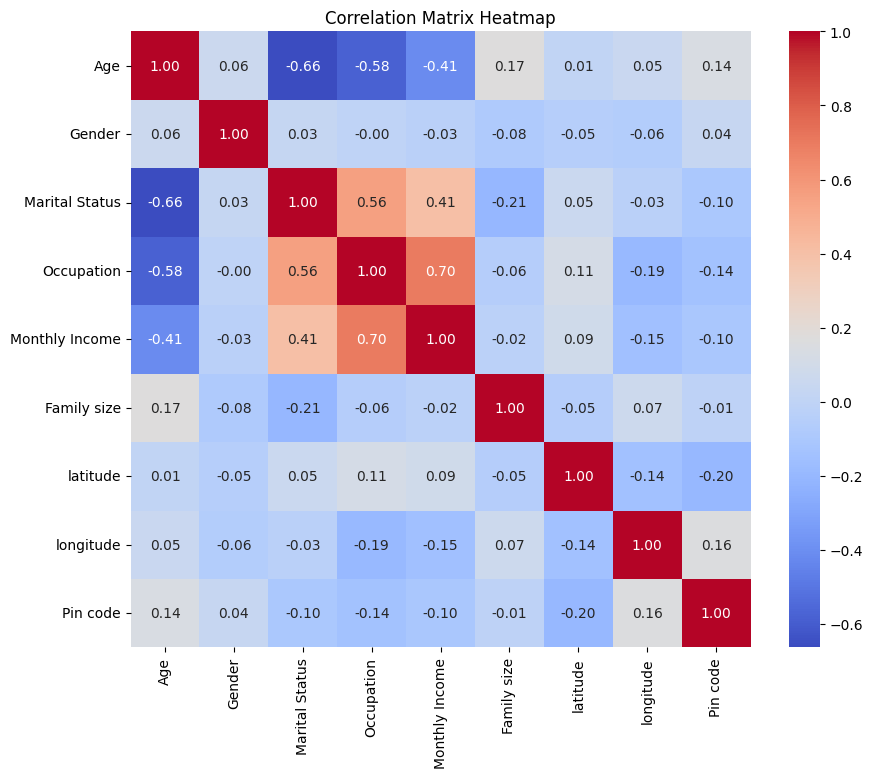

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Part 3: Logistic Regression Model

In [ ]:
X = data[selected_features]
y = data['Feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8589743589743589
Precision: 0.8589743589743589
Recall: 1.0
Confusion Matrix:
 [[ 0 11]
 [ 0 67]]



The model achieved an accuracy of approximately 85.9%, indicating its overall correctness. With a precision of 85.9%, it correctly identifies positive feedback most of the time. The recall score is 100%, suggesting the model captures all instances of positive feedback. However, the confusion matrix shows no true negatives, indicating potential bias towards positive predictions.

Part 4: Data Analysis and Visualization

In [ ]:
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': model.coef_[0]})
print(feature_importance)

          Feature  Importance
0             Age   -0.091064
1  Monthly Income    0.093574
2          Gender   -0.142964
3  Marital Status    0.203283
4      Occupation    0.057621


Age: Older customers tend to give more positive feedback, suggesting age influences satisfaction levels.

Monthly Income: Higher earners are more likely to provide positive feedback, indicating a correlation between income and satisfaction.

Gender: There's variation between genders in feedback, suggesting different perspectives on online food experiences.

Marital Status: Married individuals tend to give more positive feedback compared to singles, indicating marital status affects satisfaction levels.

Occupation: Different occupations show varying tendencies towards positive feedback, suggesting job roles influence satisfaction.

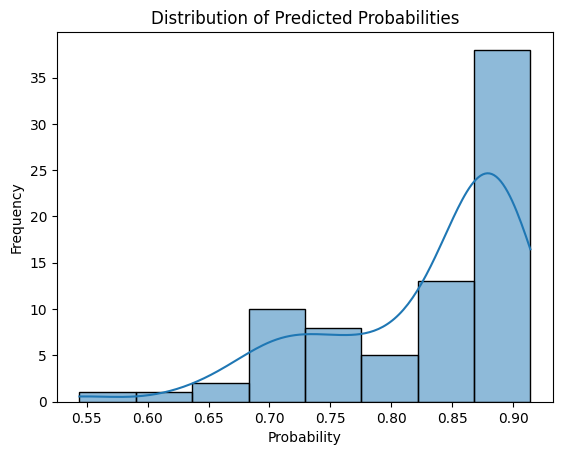

In [ ]:
predicted_probabilities = model.predict_proba(X_test)[:, 1]
sns.histplot(predicted_probabilities, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

By visualizing the distribution of predicted probabilities, we observe a histogram showing the spread of probabilities assigned by the model to each instance in the test data. From this visualization, we can infer patterns in the likelihood of positive feedback. For instance, if the distribution is skewed towards higher probabilities, it suggests that the model is confident in predicting positive feedback for certain instances. Conversely, if the distribution is more spread out, it indicates uncertainty or variability in the model's predictions.